In [1]:
from kafka import KafkaConsumer
import json
import matplotlib.pyplot as plt
import time

In [2]:
# Initialize data storage for plotting
timestamps = []
water_temperatures = []
ph_levels = []
turbidities = []
dissolved_oxygen_levels = []

In [3]:
# Kafka configuration
def initialize_consumer():
    kafka_topic = "water_quality"
    kafka_bootstrap_servers = ["localhost:9092"]

    # Create Kafka consumer
    consumer = KafkaConsumer(
        kafka_topic,
        bootstrap_servers=kafka_bootstrap_servers,
        value_deserializer=lambda m: json.loads(m.decode('utf-8')),
        auto_offset_reset='latest',
        enable_auto_commit=True
    )
    return consumer

In [4]:
# Receive all published messages and update plot
def update_plot(consumer):
    try:
        for message in consumer:
            # Parse the message
            sensor_data = message.value
            print(f"Received: {sensor_data}")

            # Update data storage
            timestamps.append(sensor_data['timestamp'])
            water_temperatures.append(sensor_data['water_temperature'])
            ph_levels.append(sensor_data['ph_level'])
            turbidities.append(sensor_data['turbidity'])
            dissolved_oxygen_levels.append(sensor_data['dissolved_oxygen'])

            # Keep only the last 100 entries for plotting
            if len(timestamps) > 100:
                timestamps.pop(0)
                water_temperatures.pop(0)
                ph_levels.pop(0)
                turbidities.pop(0)
                dissolved_oxygen_levels.pop(0)

            # Clear the current axes and redraw the plots
            plt.figure(figsize=(10, 8))

            plt.subplot(2, 2, 1)
            plt.plot(timestamps, water_temperatures, label="Water Temperature", color="blue")
            plt.title("Water Temperature")
            plt.ylabel("°C")

            plt.subplot(2, 2, 2)
            plt.plot(timestamps, ph_levels, label="pH Level", color="green")
            plt.title("pH Level")
            plt.ylabel("pH")

            plt.subplot(2, 2, 3)
            plt.plot(timestamps, turbidities, label="Turbidity", color="orange")
            plt.title("Turbidity")
            plt.ylabel("NTU")

            plt.subplot(2, 2, 4)
            plt.plot(timestamps, dissolved_oxygen_levels, label="Dissolved Oxygen", color="red")
            plt.title("Dissolved Oxygen")
            plt.ylabel("mg/L")

            plt.tight_layout()

            # Save the plot as an image
            plt.savefig(f"water_quality_plot.png")
            plt.close()

            break  # Process one message at a time
    except KeyboardInterrupt:
        print("Stopped consuming messages.")
        consumer.close()

Subscribed to Kafka topic 'water_quality'.
Received: {'timestamp': 1741179885, 'water_temperature': 26.591752263474113, 'ph_level': 7.920083975168493, 'turbidity': 6.68, 'dissolved_oxygen': 5.01}
Received: {'timestamp': 1741179886, 'water_temperature': 27.569930710274104, 'ph_level': 7.834614528656053, 'turbidity': 12.84, 'dissolved_oxygen': 5.95}
Received: {'timestamp': 1741179887, 'water_temperature': 27.920287611015798, 'ph_level': 8.361653619513195, 'turbidity': 29.84, 'dissolved_oxygen': 11.88}
Received: {'timestamp': 1741179888, 'water_temperature': 27.23311036213455, 'ph_level': 8.009719233979608, 'turbidity': 42.23, 'dissolved_oxygen': 7.77}
Received: {'timestamp': 1741179889, 'water_temperature': 26.894389584592123, 'ph_level': 8.284518921506695, 'turbidity': 32.66, 'dissolved_oxygen': 7.81}
Received: {'timestamp': 1741179890, 'water_temperature': 26.70138261578939, 'ph_level': 8.288672449563512, 'turbidity': 41.48, 'dissolved_oxygen': 5.44}
Received: {'timestamp': 1741179891,

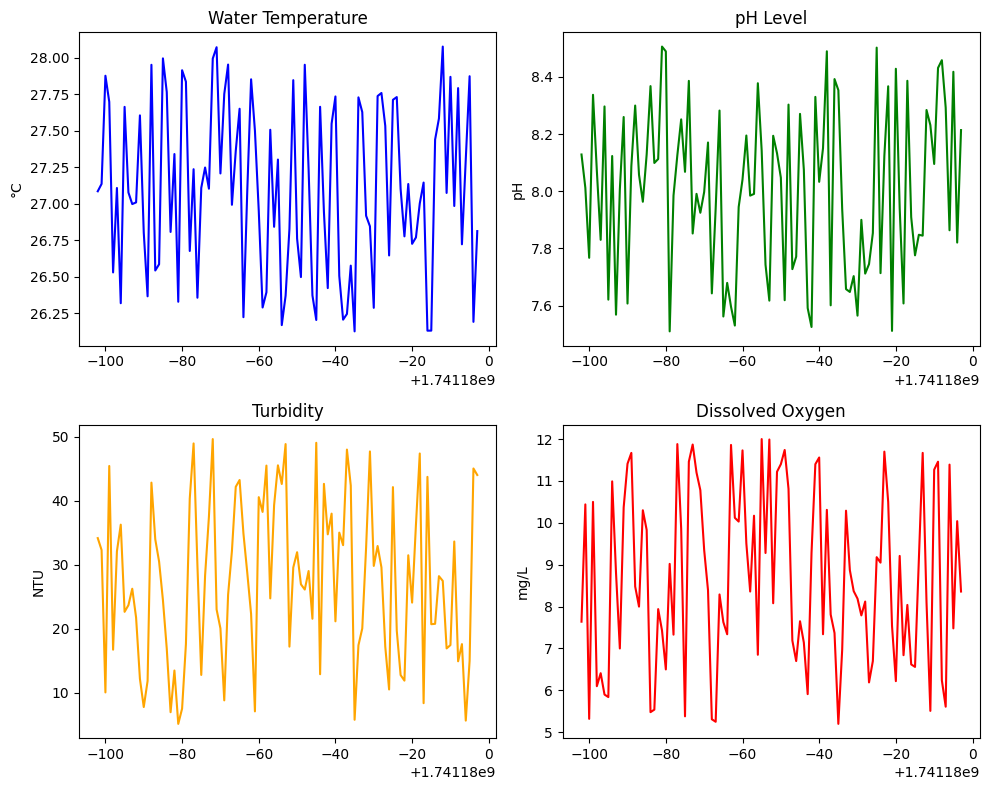

In [5]:
consumer = initialize_consumer()
print("Subscribed to Kafka topic 'water_quality'.")

try:
    while True:
        update_plot(consumer)
except KeyboardInterrupt:
    print("Stopped visualization.")
    consumer.close()